In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import pearsonr, chi2_contingency, spearmanr

In [2]:
# Đọc dữ liệu 
df = pd.read_csv('house_price_Dống-Da_Hà-Nội_subdata.csv')

In [3]:
df

,area,price,postDate,land_certificate,house_direction,balcony_direction,toilet,bedroom,floor,lat,long,property_type
0,50.0,14700.0,44197,So do,NaN,NaN,4.0,6.0,6.0,21.015698,105.824583,trong ngo
1,57.0,4200.0,44265,So do,Nam,Nam,3.0,8.0,4.0,21.025208,105.833111,trong ngo
2,62.0,11000.0,44268,So do,NaN,dong-Nam,6.0,5.0,6.0,21.025379,105.801011,trong ngo
3,26.0,2900.0,44292,So do,NaN,NaN,4.0,3.0,4.0,21.014325,105.834918,trong ngo
4,40.0,3950.0,44292,So do,NaN,NaN,NaN,NaN,5.0,21.009862,105.838083,trong ngo
...,...,...,...,...,...,...,...,...,...,...,...,...
666,168.0,23500.0,44325,NaN,NaN,NaN,3.0,3.0,3.0,21.000823,105.829097,mat pho
667,65.0,17500.0,44325,So do,NaN,NaN,NaN,6.0,5.0,21.011495,105.816666,mat pho
668,60.0,17500.0,44197,NaN,NaN,NaN,NaN,NaN,NaN,21.011495,105.816666,mat pho
669,45.0,24800.0,44197,NaN,NaN,NaN,NaN,NaN,NaN,21.016106,105.832157,mat pho


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 671 entries, 0 to 670
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   area               665 non-null    float64
 1   price              617 non-null    float64
 2   postDate           671 non-null    int64  
 3   land_certificate   369 non-null    object 
 4   house_direction    42 non-null     object 
 5   balcony_direction  24 non-null     object 
 6   toilet             240 non-null    float64
 7   bedroom            320 non-null    float64
 8   floor              366 non-null    float64
 9   lat                671 non-null    float64
 10  long               671 non-null    float64
 11  property_type      671 non-null    object 
dtypes: float64(7), int64(1), object(4)
memory usage: 63.0+ KB


In [5]:
df.dropna()

,area,price,postDate,land_certificate,house_direction,balcony_direction,toilet,bedroom,floor,lat,long,property_type
1,57.0,4200.0,44265,So do,Nam,Nam,3.0,8.0,4.0,21.025208,105.833111,trong ngo
7,52.2,5376.6,44292,So do,Tay-Bac,Tay-Bac,1.0,2.0,3.0,21.019078,105.819259,trong ngo
220,61.0,12500.0,44306,So do,dong-Nam,dong-Nam,4.0,6.0,5.0,21.009410,105.824307,trong ngo
223,37.0,3800.0,44306,So do,dong,dong,3.0,3.0,4.0,21.012872,105.833187,trong ngo
230,35.0,4250.0,44306,So do,Bac,Bac,4.0,3.0,5.0,21.024038,105.802626,trong ngo
278,50.0,14600.0,44312,So do,Tay-Nam,Tay-Nam,4.0,6.0,4.0,21.016075,105.824436,trong ngo
382,51.0,3900.0,44323,So do,Tay-Nam,Tay-Nam,4.0,4.0,5.0,21.022578,105.831854,trong ngo
417,55.0,16000.0,44325,So do,dong-Nam,dong-Nam,6.0,6.0,7.0,21.012334,105.819316,trong ngo
419,49.0,9000.0,44325,So do,Tay-Nam,Tay-Nam,4.0,6.0,4.0,21.013450,105.815619,trong ngo
421,56.0,6200.0,44325,So do,Tay-Bac,dong-Nam,4.0,4.0,5.0,21.013369,105.827251,trong ngo


# 1. Giữa giá nhà và diện tích có tương quan với nhau?
#### Vì giá nhà và diện tích là 2 biến định lượng vì vậy dùng kiểm định person
- Giả thuyết 1 : $H_0$  2 biến không có mỗi liên hệ ( r = 0 )
- Giả thuyết 2 : $H_1$  2 biến có mối liên hệ ( r # 0 )  

In [6]:
df1 = df[['area','price']]

In [7]:
df1 = df1.dropna()

In [8]:
print(stats.pearsonr(df1.area, df1.price))

(0.22852101906798145, 9.947613326077062e-09)


In [9]:
# vậy với pvalues < 0.05 thì giá nhà và diện tích có mức độ tương quan tuyến tính yếu

# 2. Giữa giá nhà và tọa độ địa lý (lat, long) có tương quan với nhau
#### Vì giá nhà và tọa độ là 2 biến định lượng vì vậy dùng kiểm định person
- Giả thuyết 1 : $H_0$  2 biến không có mỗi liên hệ ( r = 0 )
- Giả thuyết 2 : $H_1$  2 biến có mối liên hệ ( r # 0 )  

In [10]:
df2 = df.filter(['price', 'long', 'lat'])
df2

,price,long,lat
0,14700.0,105.824583,21.015698
1,4200.0,105.833111,21.025208
2,11000.0,105.801011,21.025379
3,2900.0,105.834918,21.014325
4,3950.0,105.838083,21.009862
...,...,...,...
666,23500.0,105.829097,21.000823
667,17500.0,105.816666,21.011495
668,17500.0,105.816666,21.011495
669,24800.0,105.832157,21.016106


In [11]:
df2.isnull().sum()

price    54
long      0
lat       0
dtype: int64

In [12]:
df2 = df2.dropna()

In [13]:
r,pvalues = pearsonr(x=df2['price'], y=df2['long'])

In [14]:
print('r = %.3f, pvalues = %.3f'%(r,pvalues))

r = 0.071, pvalues = 0.077


In [15]:
# vì pvalues < 0.05 nên bác bỏ $H_0$ 

In [16]:
r,pvalues = pearsonr(x=df2['price'], y=df2['lat'])
print('r = %.3f, pvalues = %.3f'%(r,pvalues))

r = -0.055, pvalues = 0.174


In [17]:
# vì pvalues < 0.05 nên bác bỏ $H_0$ 

# 3. Giữa thuộc tính land_certificate và property_type có tương quan với nhau
#### 2 cột thuộc tính này là biến định tính nên ta dùng kiểm định chi-square
- Giả thuyết 1 : $H_0$  2 biến không có mỗi liên hệ ( r = 0 )
- Giả thuyết 2 : $H_1$  2 biến có mối liên hệ ( r # 0 )  

In [18]:
contigency= pd.crosstab(index=df['property_type'], columns=df['land_certificate'].fillna('non_certificate'))

<AxesSubplot:xlabel='land_certificate', ylabel='property_type'>

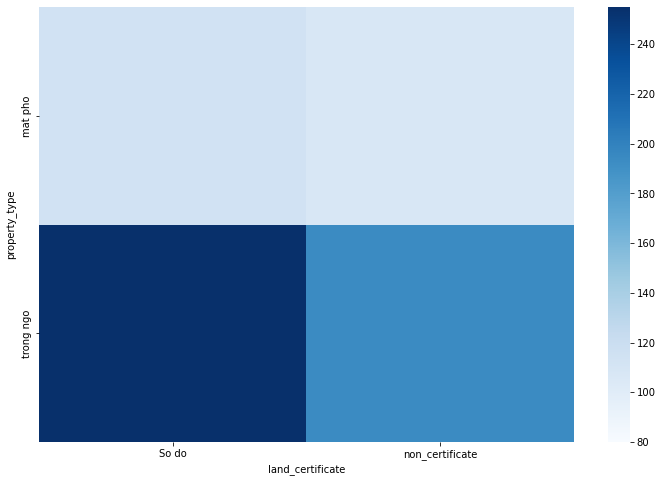

In [19]:
plt.figure(figsize=(12,8))
sns.heatmap(contigency, cmap='Blues', vmin = 80)

In [20]:
c, p, dof, expected = chi2_contingency(contigency)

In [21]:
print('P_values = ',p)

P_values =  0.21106331497658834


In [22]:
# vì p < 0.05 đủ cơ sở để kết luận 2 thuộc tính liên quan với nhau.

4. Hãy  mã hóa lại thuộc tính giá nhà theo đơn vị (nghìn đồng/m2) và sắp xếp giá nhà thành 4 mức tương ứng với các khoảng tứ phân vị. Tiến hành kiểm định tương quan giữa biến giá nhà này với các biến tọa độ vị trí (lat, long)

In [23]:
df['price/m2'] = df['price'] / df['area']

In [24]:
q1 = df['price/m2'].quantile(q = 0.25)
q2 = df['price/m2'].quantile(q = 0.50)
q3 = df['price/m2'].quantile(q = 0.75)

In [25]:
bins = [df['price/m2'] < q1,\
    (df['price/m2'] >= q1) & (df['price/m2'] < q2),\
        (df['price/m2'] >= q2) & (df['price/m2'] < q3), \
            df['price/m2'] >= q3]
cats = [1,2,3,4]
df['price/m2_oridinal'] = np.select(condlist = bins, choicelist = cats)

In [26]:
##### 1 định tính và 1 định lượng vì vậy dùng kiểm đinh  spearman
